In [1]:
import os
os.environ['R_HOME'] = "C:\Program Files\R\R-4.3.2"
import scanpy as sc
import anndata as ad
from Benchmark import monocle_v3

In [2]:
import torch
if torch.cuda.is_available():
    !nvidia-smi
else:
    print("GPU is not available")

GPU is not available


In [3]:
ref = sc.read_h5ad("./Data/PBMC_Batch/PBMCA.h5ad")
adata1 = sc.read_h5ad("./Data/PBMC_Batch/PBMCB.h5ad")
adata = ad.concat([ref, adata1], label="batch")

d:\Program\Anaconda3\envs\bioinfo\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


d:\Program\Anaconda3\envs\bioinfo\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
d:\Program\Anaconda3\envs\bioinfo\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
d:\Program\Anaconda3\envs\bioinfo\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWa

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.4 scipy==1.11.1 pandas==1.5.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.8 pynndescent==0.5.10


d:\Program\Anaconda3\envs\bioinfo\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
d:\Program\Anaconda3\envs\bioinfo\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


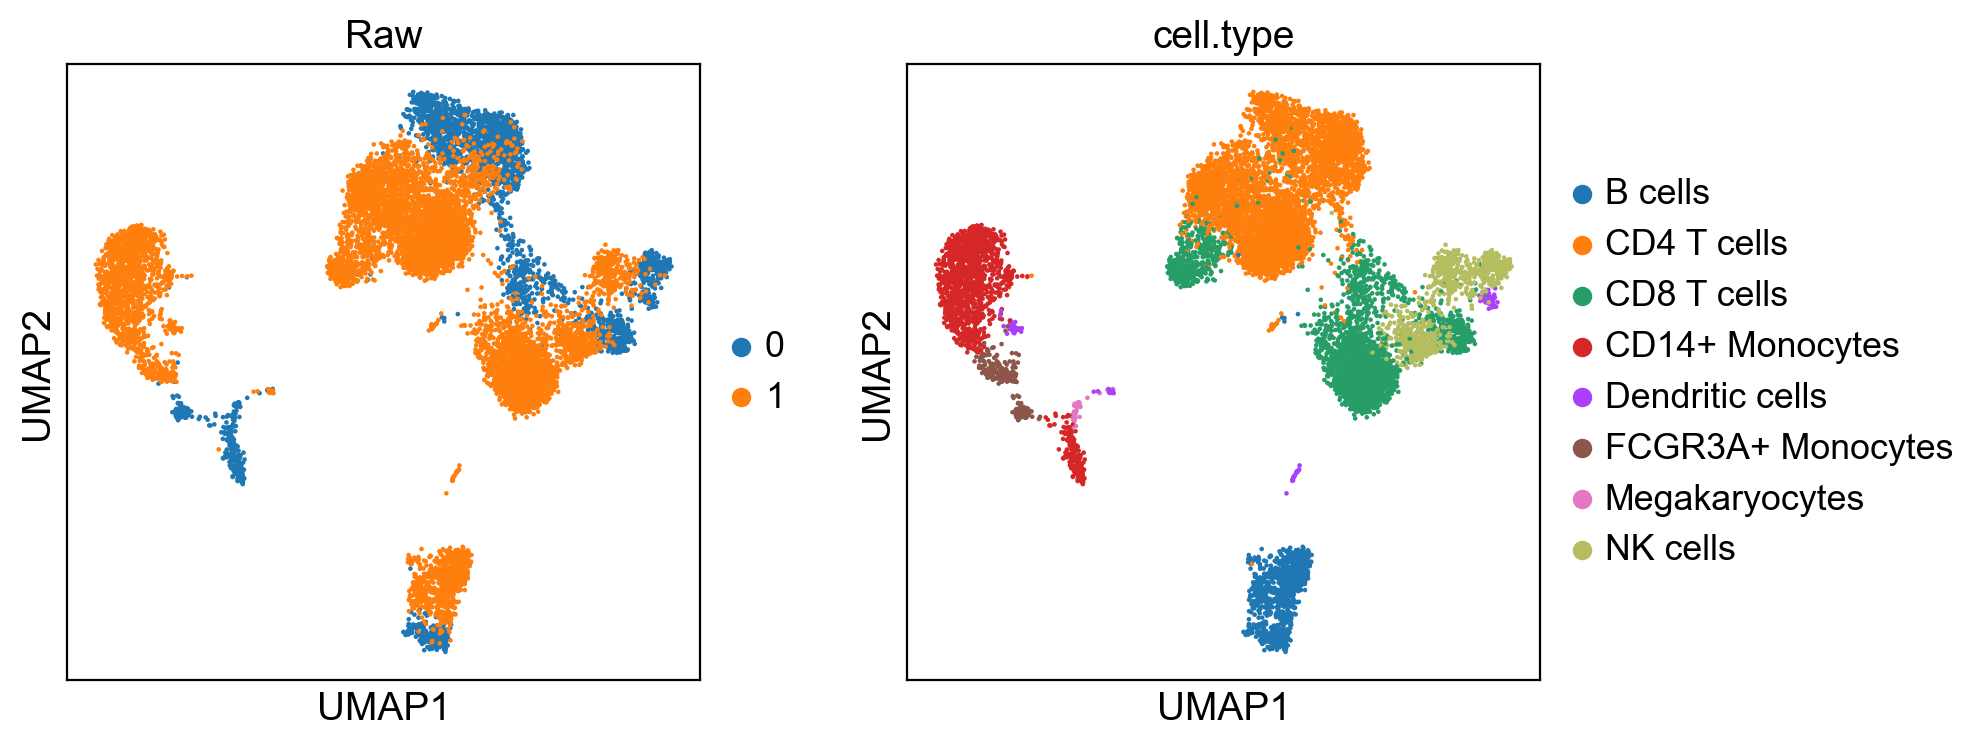

In [4]:
sc.settings.verbosity = 1
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["batch", "cell.type"], title="Raw")

In [5]:
monocle_v3(adata, random_state=42, save_dir = "./temp/")

Use computed Umap


d:\Program\Anaconda3\envs\bioinfo\lib\functools.py:889: UserWarning: Duplicated obs_names: Index(['AAATTGACCATGCA-1', 'AAATTGACCATGCA-1', 'AATATCGACTGATG-1',
       'AATATCGACTGATG-1', 'ACTACTACACACCA-1', 'ACTACTACACACCA-1',
       'ACTCTCCTTGCTAG-1', 'ACTCTCCTTGCTAG-1', 'AGCTCGCTTGGCAT-1',
       'AGCTCGCTTGGCAT-1', 'ATTCTTCTGAAAGT-1', 'ATTCTTCTGAAAGT-1',
       'CACAGCCTGCAGTT-1', 'CACAGCCTGCAGTT-1', 'CACCGTACATCGGT-1',
       'CACCGTACATCGGT-1', 'CATATAGAGGTGGA-1', 'CATATAGAGGTGGA-1',
       'CCAGTCACCCTTCG-1', 'CCAGTCACCCTTCG-1', 'CCCATCGAAAAACG-1',
       'CCCATCGAAAAACG-1', 'GAACGGGAAAAGTG-1', 'GAACGGGAAAAGTG-1',
       'GAAGTGCTAGTTCG-1', 'GAAGTGCTAGTTCG-1', 'GACCTCTGCGCATA-1',
       'GACCTCTGCGCATA-1', 'GAGGGTGAGATGAA-1', 'GAGGGTGAGATGAA-1',
       'GAGTACTGTGGTTG-1', 'GAGTACTGTGGTTG-1', 'GCATGTGAGTGCTA-1',
       'GCATGTGAGTGCTA-1', 'GCCAAAACTGTCGA-1', 'GCCAAAACTGTCGA-1',
       'GCTAGAACCAGAGG-1', 'GCTAGAACCAGAGG-1', 'GCTATACTTCGCAA-1',
       'GCTATACTTCGCAA-1', 'GGACCGTGAA


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Exception ignored from cffi callback <function _consolewrite_ex at 0x00000274446C84C0>:
Traceback (most recent call last):
  File "d:\Program\Anaconda3\envs\bioinfo\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 133, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "d:\Program\Anaconda3\envs\bioinfo\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 138, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd4 in position 1: invalid continuation byte
R[write to console]: The following object is masked from 'package:SummarizedExperiment':

    Assays


R[write to console]: Warning:
R[write to console]:  Data is of class matrix. Coercing to dgCMatrix.

Exception ignored from cffi callback <function _consolewrite_ex at 0x00000274446C84C0>:
Traceback (most recent call last):
  File "d:\Program\Anaconda3\envs\bioinfo\lib\site-packages\rpy2\rinterface

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc0 in position 35: invalid start byte